0.12500000000000003

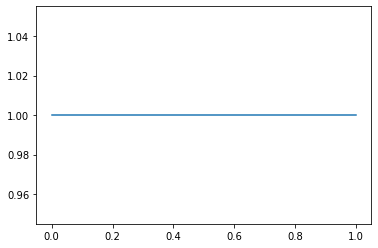

In [8]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(0, 1, 100)
a = 1
b = 1
plt.plot(x, beta.pdf(x, a, b))
from scipy.stats import binom
binom.pmf(0, 3, 0.5)

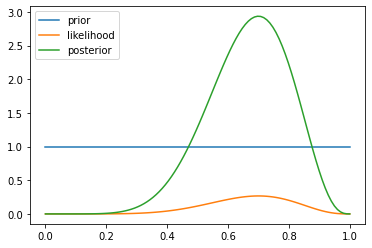

In [9]:
# If we observe n_successes and n_failures then the posterior is a + n_successs, b + n_failures
n_successes = 7
n_failures = 3
plt.plot(x, beta.pdf(x, a, b), 
         x, binom.pmf(n_successes, n_successes + n_failures, x),
         x, beta.pdf(x, a + n_successes, b + n_failures))
plt.legend(["prior", "likelihood", "posterior"])

In [18]:
import numpy as np
## Two models, with different accuracies
accuracy = [0.6, 0.7]

def generate_uncorrelated_utils(n_examples, accuracy):
    n_models = len(accuracy) # finite number of models
    utils = np.zeros([n_examples, n_models]) # measure whether or not the models predict correctly
    
    for t in range(n_examples):
        for k in range(n_models):
            if (np.random.uniform() < accuracy[k]):
                utils[t,k] = 1
    return utils

def generate_correlated_utils(n_examples, accuracy):
    n_models = len(accuracy)
    utils = np.zeros([n_examples, n_models])
    for t in range(n_examples):
        X = np.random.uniform()
        for k in range(n_models):
            if (0.5 * (X + np.random.uniform()) < accuracy[k]):
                utils[t,k] = 1
    return utils

n_examples = 100
correlated = generate_correlated_utils(n_examples, accuracy)
uncorrelated = generate_uncorrelated_utils(n_examples, accuracy)

print(np.mean(correlated[:,0] - correlated[:,1]))
print(np.mean(uncorrelated[:,0] - uncorrelated[:,1]))

a = 1
b = 1



-0.21
-0.1


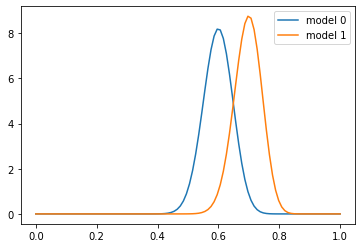

In [19]:
plt.plot(x, beta.pdf(x, a + sum(uncorrelated[:,0]), b + n_examples - sum(uncorrelated[:,0])), 
         x, beta.pdf(x, a + sum(uncorrelated[:,1]), b + n_examples - sum(uncorrelated[:,1])),
        )
plt.legend(["model 0", "model 1"])




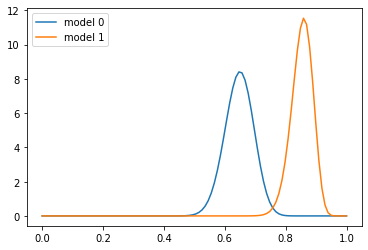

In [20]:
plt.plot(x, beta.pdf(x, a + sum(correlated[:,0]), b + n_examples - sum(correlated[:,0])), 
         x, beta.pdf(x, a + sum(correlated[:,1]), b + n_examples - sum(correlated[:,1])),
        )
plt.legend(["model 0", "model 1"])


In [ ]:
## Next time: Use bootstrap sampling to plot the distributions of correct outcomes, as well as the difference

In [24]:
np.mean(correlated[:,1])

0.86